# Notebook 02 – Data Loading and Preprocessing

This notebook prepares the Alzheimer's disease dataset so it can be used in analysis and machine learning.  
We clean and transform the data to ensure high quality and usability.

#### In this notebook we:
- Load the dataset and take a first look at it.
- Find and handle missing values.
- Remove any duplicate rows.
- Convert text categories into numbers so the computer can understand them. (encoding)
- Organize the data in a way that makes it ready for analysis.

The cleaned data we create here will be used in the next notebook for exploring patterns and building models.

----------------------------------------------

## Setup And Load Environment

To get started, we need to set up our working environment. For this, we use some helper functions that we have created and stored in a folder called utils. These helper functions help us:
- Create folders to keep the project organized (such as data, models, plots, and reports)
- Apply default chart styles using Seaborn
- Load datasets and quickly explore them

Along with that, we also import common libraries like Pandas, NumPy, Seaborn and Matplotlib, which we will be using throughout the project.

In [27]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Importing commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


----------------------------

## Extract – Load the Dataset

In this step, we load the raw Alzheimer's dataset into our project using a custom helper function from our setup.py script. The dataset has not yet been cleaned or processed, this is the original version as collected.
Our helper function uses pandas to read the CSV file and automatically provides basic metadata. 

### Including:
- The file path from which the data was loaded.  
- The number of rows and columns present in the dataset.  

This step ensures that we have successfully accessed the correct dataset and gives us an initial understanding of its structure and scale before we proceed with cleaning and transformation. To keep the original intact, a working copy is also created. This ensures we can freely clean, explore, and manipulate the data without altering the raw file.

In [28]:
# We load the raw Alzheimer's dataset and save it as 'df_raw'
df_raw = load_csv("../data/alzheimers_disease_raw_data.csv")

# Then create a working copy to avoid modifying the raw dataset directly
df = df_raw.copy()
print("Copy of df_raw dataset created as 'df' succesfully")

Loaded data from ../data/alzheimers_disease_raw_data.csv with shape (2149, 35)
Copy of df_raw dataset created as 'df' succesfully


Thereafter save the working copy of the dataset to the project folder. This allows us to reuse it later without reloading or reprocessing the raw data each time. It also keeps the original dataset unchanged in case we need to go back to it.

In [29]:
# Save the copy of the dataset for future steps
df.to_csv("../data/alzheimers_raw_copy.csv", index=False)
print("Dataset saved to ../data/alzheimers_raw_copy.csv")

Dataset saved to ../data/alzheimers_raw_copy.csv


------------------------------

### ELT Approach: Extract → Load → Transform

In this project, we follow the ELT (Extract, Load, Transform) process to prepare the Alzheimer’s dataset for analysis and modeling.
- **Extract**: We begin by accessing the raw dataset, which is provided in CSV format.
- **Load**: Using pandas, we load the dataset into memory so it can be explored and manipulated.
- **Transform**: We then clean and organize the data by checking for duplicates, handling missing values, removing unnecessary ID columns, and grouping features by type. These steps make the dataset ready for machine learning.

This approach reflects a modern data workflow, where raw data is loaded first and then transformed in memory. It allows for faster iteration, flexible processing, and better reproducibility.

---------------

## Alternative Approach – Load Libraries

Before we can work with the data, we need to import the necessary Python libraries:

- **pandas** is used for handling tabular data (structured data in rows and columns, like a spreadsheet). It helps us load, clean, and manage datasets.
- **numpy** is used for numerical operations, especially with arrays and mathematical functions.
- **matplotlib.pyplot** and **seaborn** are used for visualizing data through plots and charts.

After importing the libraries, we use `read_csv()` to load the dataset into a DataFrame called `df`, and use `head()` to preview the first five rows.

This setup step is important because it gives us the tools needed for cleaning, exploring, and later modeling the dataset.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

print("All libraries imported and environment initialized.")

All libraries imported and environment initialized.


In [31]:
# We load the dataset
dataframe = pd.read_csv("../data/alzheimers_disease_raw_data.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


-----------------------------------------

## Initial Data Inspection

Now that the dataset is loaded and saved as a dataframe, we begin performing an initial inspection to understand the structure and contents. This helps us identify potential issues early and plan the cleaning steps that follow. We focus on:
- The number of rows and columns in dataframe.
- The data types of each column.
- The presence of missing values.
- Descriptive statistics for both numeric and categorical variables.
- A sample of the first 5 rows for quick overview.

In [34]:
# Check the number of rows and columns in the dataframe
print_shape(df)

----- Dataset Shape -----
Rows: 2149, Columns: 35


#### Dataset Dimensions
The dataset contains 2,149 rows and 35 columns. Each row represents one patient, and each column provides a specific clinical, lifestyle, or cognitive feature.

In [35]:
# View data types and non-null counts for each column
print_info(df)


----- Data Types and Non-Null Counts -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 35 entries, PatientID to DoctorInCharge
dtypes: float64(12), int64(22), object(1)
memory usage: 587.7+ KB


#### Data Types and Completeness
All 35 columns are fully populated, meaning there are no missing values in any part of the dataset.
The data types are mostly numeric:

- 22 columns are stored as integers (0 or 1 for yes/no values).
- 12 columns are float values, which allow decimals.
- 1 column (DoctorInCharge) is a text field and not needed for modeling.

This structure makes the data ready for analysis without needing to fill or drop missing values.

In [36]:
# View full dataset structure with memory usage and types
print_full_info(df)


----- Full Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes         

#### Memory and Structure
The dataset uses about 587 KB of memory, which is very manageable for analysis in a local environment.
Each column has the correct data type, and pandas has successfully recognized the structure. This means no extra type conversions are required at this stage.

In [37]:
# Get descriptive statistics for all variables (numeric and categorical)
print_description(df)


----- Statistical Summary -----
This summary includes count, mean, std, min, max, and percentiles.



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2149.0,NaN,NaN,NaN,5825.0,620.507185,4751.0,5288.0,5825.0,6362.0,6899.0
Age,2149.0,NaN,NaN,NaN,74.908795,8.990221,60.0,67.0,75.0,83.0,90.0
Gender,2149.0,NaN,NaN,NaN,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,NaN,NaN,NaN,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,NaN,NaN,NaN,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
BMI,2149.0,NaN,NaN,NaN,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,NaN,NaN,NaN,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
AlcoholConsumption,2149.0,NaN,NaN,NaN,10.039442,5.75791,0.002003,5.13981,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,NaN,NaN,NaN,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,NaN,NaN,NaN,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


### Key Statistics and Distributions

Looking at the data more closely helps us see patterns and differences between patients. This step is useful for figuring out which features might help us predict Alzheimer’s and which ones might need extra processing later (like adjusting the scale or changing the format).

### Key Points

- **Age**: Most patients are between 60 and 90 years old, with an average age of about 75. This makes sense since Alzheimer’s mostly affects older adults.

- **BMI (Body Mass Index)**: The average BMI is around 27.7, which falls in the overweight range. Since weight can affect both physical and brain health, BMI might be an important feature in our predictions.

- **Alcohol Consumption**: On average, patients drink about 10 units of alcohol per week. Some drink more, some less. This difference could matter when we look at lifestyle risk factors.

- **Blood Pressure (Systolic and Diastolic)**: The blood pressure numbers look normal for older adults, but there’s quite a bit of variation. That could be important since heart health is linked to brain health.

- **Cholesterol Levels**: These also vary a lot between people:
  - **Total cholesterol:** Average is about 225 mg/dL  
  - **LDL (bad cholesterol):** About 124 mg/dL  
  - **HDL (good cholesterol):** Around 59 mg/dL  
  - **Triglycerides:** These have the widest range and highest average, which might show differences in metabolism between patients.


- **MMSE Scores**: These scores, which check memory and thinking, range from 0 to 30. The average score is around 14.7, which means many patients show signs of cognitive decline.

- **Binary Medical Conditions**: Things like Diabetes, Depression, and Hypertension are shown as 0 (no) or 1 (yes). These conditions may increase the risk of Alzheimer’s and can be useful in prediction.

By reviewing the distributions and summary statistics, we get an early sense of which variables might be strong predictors, which ones are well-behaved, and whether we need to prepare the data in any special way (like removing outliers or standardizing ranges).

In [38]:
# Preview the first few rows to understand how values are structured
show_head(df)


----- First 5 Rows -----


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


#### First 5 rows overview
**The first five rows show that:**
- All values are properly formatted.
- Column names and values are clearly labeled.
- There's good variety in the data—no obvious errors, typos, or missing data.

## Indentify Categorical Features

In [19]:
# View summary of categorical columns 
print_categorical_description(df)


----- Categorical Summary -----


,count,unique,top,freq
DoctorInCharge,2149,1,XXXConfid,2149


This helps us understand non-numeric features (e.g., DoctorInCharge). In our case, this column holds anonymized IDs and won't be used for modeling, but it’s good practice to review these separately.


----------------------

## Understanding the Columns

Before cleaning or analyzing the data, we need to know what each column represents. This is a key part of **data exploration** in Business Intelligence. By understanding the **data types** and what the values mean, we avoid making wrong decisions. This follows the **GIGO principle**: *Garbage In, Garbage Out*. If the input data is poor or unclear, the results will also be poor, no matter how advanced the analysis.


### Column Overview

- **PatientID** – *ID* – A unique number for each patient. Not used for prediction.  
- **Age** – *Numeric* – The patient's age in years.  
- **Gender** – *Categorical* – 0 = Female, 1 = Male.  
- **Ethnicity** – *Categorical* – Example: 0 = White, 1 = Black, etc.  
- **EducationLevel** – *Ordinal* – Higher number means more education.  
- **BMI** – *Numeric* – Body Mass Index (based on height and weight). 
- **Smoking** – *Binary* – 0 = No, 1 = Yes.  
- **AlcoholConsumption** – *Numeric* – Amount of alcohol used.  
- **PhysicalActivity** – *Numeric* – How active the person is.
- **DietQuality** – *Numeric* – Higher number = healthier diet.  
- **ADL** – *Numeric* – Level of help needed with daily tasks.  
- **Diagnosis** – *Target label* – 0 = No Alzheimer’s, 1 = Alzheimer’s.  

Other columns like **Confusion**, **MemoryComplaints**, and **PersonalityChanges** are binary symptoms: 0 = No, 1 = Yes.

#### Why this is important
If we do not understand what the data means, we can not clean it or use it properly. This step helps us avoid wrong assumptions and prepares the data for meaningful analysis.

### Column Types and Unique Values

Now we check two important things about the columns:

1. **Data types** – Shows if values are stored as numbers (integers, floats) or as text.  
   For example, age should be numeric, while gender might be text or category codes.

2. **Unique values** – Tells how many different values exist in each column.  
   This helps identify which columns are categories (like gender or smoking) and which might be IDs (like PatientID), which are not useful for prediction.

These checks guide decisions on which columns to keep, transform, or remove later.

### Check Column Types
Before we clean or transform any columns, we need to check the data types to understand how each variable is stored. This helps us spot which columns are numeric, which are categorical, and whether anything needs to be converted.
This is an important part of data exploration. If we do not know what kind of data we are working with, we might handle it the wrong way.

In [39]:
# Display data types for each column to understand variable types
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

### Output

We see that most columns in the dataset are either stored as int64 or float64, meaning they contain numerical values. This is good because numerical data can be used directly in many types of analysis and machine learning models. We also notice that one column, DoctorInCharge, is stored as an object. This usually means it contains text or categorical labels.

We interpret this as a mostly numerical dataset, which is a good starting point for further processing. We also conclude that some columns, like PatientID and DoctorInCharge, are probably identifiers and not useful as features. These will likely be removed later to avoid adding irrelevant information to our model.


## Unique values in columns

In [40]:
# Check the number of unique values in each column
# Helps identify categorical variables and ID-like columns
df.nunique().sort_values(ascending=False)

PatientID                    2149
CholesterolTotal             2149
ADL                          2149
FunctionalAssessment         2149
MMSE                         2149
BMI                          2149
CholesterolTriglycerides     2149
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
CholesterolHDL               2149
CholesterolLDL               2149
SystolicBP                     90
DiastolicBP                    60
Age                            31
Ethnicity                       4
EducationLevel                  4
BehavioralProblems              2
Diagnosis                       2
Forgetfulness                   2
DifficultyCompletingTasks       2
PersonalityChanges              2
Disorientation                  2
Confusion                       2
Gender                          2
Depression                      2
MemoryComplaints                2
HeadInjury                      2
Smoking       

#### What We Learned from Unique Values: 

Understanding the number of unique values in each column helps us decide how to handle the data later on. Since the goal of this project is to analyze and predict Alzheimer's diagnoses based on patient characteristics, we need to be clear about which features are useful for that purpose.

- PatientID has a unique value for every row, which makes it an identifier. It’s not related to the diagnosis or any medical condition, so it would not help with predictions. We'll remove it during cleaning.

- Some columns like Gender, Smoking, and Diabetes only have two unique values. These are called binary variables and are usually coded as 0 and 1, for example, 0 might mean “no” and 1 might mean “yes.” These features are important because they can show risk factors or medical conditions linked to Alzheimer’s. However, even if a column has only two values, we should always check what those values actually mean. For instance, in the Gender column, 0 might mean “Female” and 1 might mean “Male,” so it’s not a simple yes/no. We will inspect value distributions during exploratory analysis to confirm their meaning.

- Columns like Age, BMI, MMSE, and CholesterolTotal have many unique values. These are continuous numeric variables, meaning they can show subtle differences between patients. This kind of data is very useful for modeling, but it often needs to be scaled so that features with large values don’t dominate the model.

- Diagnosis also has two unique values: 0 and 1. This is our target variable. Everything else in the dataset helps us try to predict this outcome.

We’re organizing the data this way because each type of variable requires different handling in preprocessing. Binary features might be used as-is, continuous features might need scaling, and ID columns should be removed entirely. By doing this upfront, we make sure our data is well-structured and meaningful, which is essential before we move on to any analysis or modeling

----------------------------

## Identifying Potential Predictive Features

Now that we understand the structure and summary statistics of the dataset, we can start thinking about which features might be most useful for predicting Alzheimer's diagnosis.

**We approach this by looking at:**

- Clinical relevance (what the feature measures and how it connects to cognitive health).
- Variation (features that differ a lot across patients can be more informative).
- Domain logic (real-world medical knowledge and common sense).

## Which Features Might Be Strong Predictors?
To decide which features could help predict Alzheimer’s, we consider both medical logic and data variability:

- **MMSE** is likely the strongest predictor, since it directly measures cognitive ability.

- **Age, FunctionalAssessment, and ADL** are also important—older patients and those with reduced function are at higher risk.

- **Symptoms** like MemoryComplaints, Forgetfulness, Disorientation, and PersonalityChanges likely reflect cognitive decline and may have high predictive power.

- **Health conditions** like Depression, Hypertension, and Diabetes may also contribute, especially when combined with cognitive scores.

- **Lifestyle factors** like PhysicalActivity, DietQuality, and SleepQuality may have subtle influence but could become meaningful in combination with clinical features.

By understanding the structure and meaning of each variable, we are better prepared to clean the data, choose features, and begin modeling. These insights also help us decide what kind of preprocessing (e.g. scaling, encoding, or dropping) is needed in the next steps.

-------------------------------

## Feature Type Disribution

Before we move on to cleaning or modeling, it's helpful to organize the features based on the type of data they hold. Grouping columns into categories like binary, continuous, ordinal, ID, and target makes it easier to decide how each should be handled; whether that means scaling, encoding, or removing them.
The bar chart below shows how many features fall into each of these groups. This gives us a quick overview of the dataset’s structure and helps guide our preprocessing decisions.

Feature groups defined.


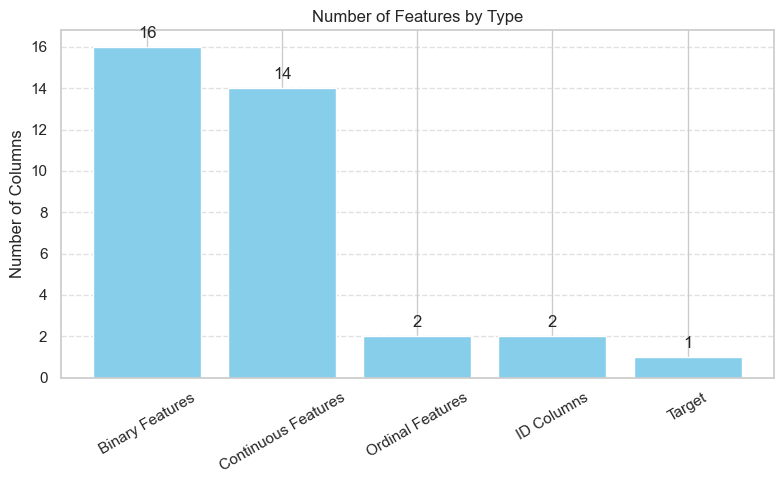

Plot saved to: ../plots\feature_type_distribution.png
Caption saved to: ../plots\feature_type_distribution.txt


In [41]:
# Define feature groups
id_columns = ["PatientID", "DoctorInCharge"]
target_column = "Diagnosis"

# Binary features (likely 0 = No, 1 = Yes)
binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

# Continuous numeric features
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal",
    "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides",
    "MMSE", "FunctionalAssessment", "ADL"
]

# Categorical (ordinal) features
ordinal_features = ["EducationLevel", "Ethnicity"]

print("Feature groups defined.")

# Count features by type
feature_counts = {
    "Binary Features": len(binary_features),
    "Continuous Features": len(continuous_features),
    "Ordinal Features": len(ordinal_features),
    "ID Columns": len(id_columns),
    "Target": 1  
}

# Convert to DataFrame
feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=["Count"])
feature_df = feature_df.sort_values("Count", ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(feature_df.index, feature_df["Count"], color='skyblue')
plt.title("Number of Features by Type")
plt.ylabel("Number of Columns")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Save and show the plot
plt.show()
fig = plt.gcf()
save_plot(
    fig,
    filename="feature_type_distribution.png",
    caption="Bar chart showing the number of features by type.",
    folder_path="../plots"
)
plt.show()

## Binary Variable Meaning

In [42]:
# Check what values are present in a few binary columns
binary_check = ["Gender", "Smoking", "Diabetes", "Diagnosis"]
for col in binary_check:
    print(f"{col}: {df[col].unique()}")


Gender: [0 1]
Smoking: [0 1]
Diabetes: [1 0]
Diagnosis: [0 1]


We confirmed that binary columns like Gender, Smoking, and Diagnosis contain values [0, 1], which represent yes/no or class labels.  
This confirms they are safe to treat as categorical or indicator variables in modeling.


----------------------

## Check and Remove Duplicate Records

Before moving forward, we check for any duplicate rows in the dataset. Duplicate records can bias the results, inflate certain patient profiles, and reduce the generalizability of models.


In [43]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicates if found
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


--------------------------

## Drop Non-Predictive Columns

We remove columns like `PatientID` and `DoctorInCharge` because they act as identifiers. These columns do not contribute useful patterns for prediction and may even introduce noise into the model.


In [44]:
# Drop ID columns
df_clean = df.drop(columns=id_columns)
print(f"Dropped identifier columns: {id_columns}")

Dropped identifier columns: ['PatientID', 'DoctorInCharge']


--------------------

## Save Cleaned Dataset

Now that we’ve reviewed and validated the dataset, we save a cleaned version for reuse in future steps like EDA and modeling. This version excludes columns like PatientID and ensures the structure is ready for analysis.

In [45]:
# Drop identifier column before saving
df_clean = df.drop(columns=["PatientID", "DoctorInCharge"])
df_clean.to_csv("../data/alzheimers_clean.csv", index=False)
print("Cleaned dataset saved as 'alzheimers_clean.csv'")

Cleaned dataset saved as 'alzheimers_clean.csv'


------------------------------

## Outlier Detection and Removal (IQR Method)


Outliers can skew analysis and negatively impact the performance of some machine learning models. Here, we use the IQR (Interquartile Range) method to identify and remove extreme values from the continuous features.

In [46]:
# Define continuous features
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]

# Create a copy for outlier processing
df_no_outliers = df_clean.copy()

# IQR-based outlier removal
for col in continuous_features:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_count = df_no_outliers.shape[0]
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    removed = original_count - df_no_outliers.shape[0]
    print(f"{col}: removed {removed} outliers")

print(f"Final shape after outlier removal: {df_no_outliers.shape}")


Age: removed 0 outliers
BMI: removed 0 outliers
PhysicalActivity: removed 0 outliers
DietQuality: removed 0 outliers
SleepQuality: removed 0 outliers
SystolicBP: removed 0 outliers
DiastolicBP: removed 0 outliers
CholesterolTotal: removed 0 outliers
CholesterolLDL: removed 0 outliers
CholesterolHDL: removed 0 outliers
CholesterolTriglycerides: removed 0 outliers
MMSE: removed 0 outliers
FunctionalAssessment: removed 0 outliers
ADL: removed 0 outliers
Final shape after outlier removal: (2149, 33)


## Save Outlier-Free Dataset
After removing outliers, we save the cleaned dataset with no outliars as a separate version. This file can be used for model training and comparison to assess the impact of outlier handling.

In [47]:
# Save the cleaned version without outliers
df_no_outliers.to_csv("../data/alzheimers_no_outliers.csv", index=False)
print("Outlier-free dataset saved as 'alzheimers_no_outliers.csv'")

Outlier-free dataset saved as 'alzheimers_no_outliers.csv'


--------------------------

## Notebook Summary

In this notebook, we loaded the raw Alzheimer’s dataset and performed several important data cleaning steps to prepare it for analysis. We began by inspecting the dataset’s structure, including data types and the number of unique values per column. We then checked for missing values both numerically and visually using a heatmap.

Although the dataset turned out to be complete, we still applied standard cleaning procedures: dropping rows with too many missing values, imputing missing numeric values using the column mean, and verifying that no missing data remained. We also checked for and confirmed that there were no duplicate records. After validating that the data was clean and consistent, we saved a cleaned version of the dataset to use in the next stages of the project.

Note on Feature Scaling
Many machine learning algorithms are sensitive to the scale of input data.
While we haven't applied any scaling in this notebook, we plan to normalize continuous features, such as Age, BMI, and MMSE, during the modeling phase using tools like StandardScaler.

This step helps ensure that features with larger numeric ranges (like blood pressure or cholesterol) don’t dominate smaller-scale features during model training, allowing the algorithm to treat all features more equally.

In [48]:
import sys
sys.path.append("..")  # Move up one directory

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="02_data_loading_and_preprocessing",
    summary={
        "description": "Loaded the raw Alzheimer's dataset, inspected structure, checked for missing values and duplicates, dropped sparse rows, imputed missing values using column means, confirmed data completeness, and saved the cleaned dataset.",
        "records_processed": 2149,
        "columns_checked": 35,
        "cleaning_steps": [
            "Inspected data types and unique value counts",
            "Checked for missing values (numeric and heatmap)",
            "Dropped rows with >2 missing values",
            "Imputed numeric missing values with column means",
            "Checked and removed duplicates (none found)"
        ],
        "validation": {
            "missing_values_remaining": 0,
            "duplicates_remaining": 0
        },
        "output_file": "../data/alzheimers_clean.csv"
    }
)

Summary saved to: ../reports\02_data_loading_and_preprocessing_summary_2025-06-09_02-03-26.json


#### This notebook concludes the data cleaning and transformation steps for Alzheimer’s risk prediction. The cleaned data will now be explored further in the next notebook (03_Exploratory_Data_Analysis).

-------------------